# Importing Libraries and Loading the Data

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV


In [177]:
# Load the data
train_data = pd.read_csv('train (1).csv')
test_data = pd.read_csv('test (2).csv')

# Exploratory Data Analysis (EDA)

In [178]:
# Check the first few rows of the training data
print(train_data.head())

   Id          Artist Name       Track Name  Popularity  danceability  energy  \
0   1    Marina Maximilian       Not Afraid        37.0         0.334   0.536   
1   2       The Black Keys  Howlin' for You        67.0         0.725   0.747   
2   3  Royal & the Serpent          phuck u         NaN         0.584   0.804   
3   4   Detroit Blues Band      Missing You        12.0         0.515   0.308   
4   5         Coast Contra          My Lady        48.0         0.565   0.777   

    key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   9.0    -6.649     0       0.0381      0.378000               NaN   
1  11.0    -5.545     1       0.0876      0.027200            0.0468   
2   7.0    -6.094     1       0.0619      0.000968            0.6350   
3   NaN   -14.711     1       0.0312      0.907000            0.0213   
4   6.0    -5.096     0       0.2490      0.183000               NaN   

   liveness  valence    tempo  duration_in min/ms  time_signature  Class  
0    

In [179]:
# Summary statistics of the training data
print(train_data.describe())

                 Id    Popularity  danceability        energy           key  \
count  14396.000000  14063.000000  14396.000000  14396.000000  12787.000000   
mean    7198.500000     44.525208      0.543105      0.662422      5.953781   
std     4155.911573     17.418940      0.165517      0.235967      3.200013   
min        1.000000      1.000000      0.059600      0.001210      1.000000   
25%     3599.750000     33.000000      0.432000      0.508000      3.000000   
50%     7198.500000     44.000000      0.545000      0.699000      6.000000   
75%    10797.250000     56.000000      0.658000      0.861000      9.000000   
max    14396.000000    100.000000      0.989000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  14396.000000  14396.000000  14396.000000  14396.000000   
mean      -7.900852      0.640247      0.080181      0.246746   
std        4.057362      0.479944      0.085157      0.310922   
min      -39.952000      0.0

In [180]:
# Check for any missing values
print(train_data.isnull().sum())

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


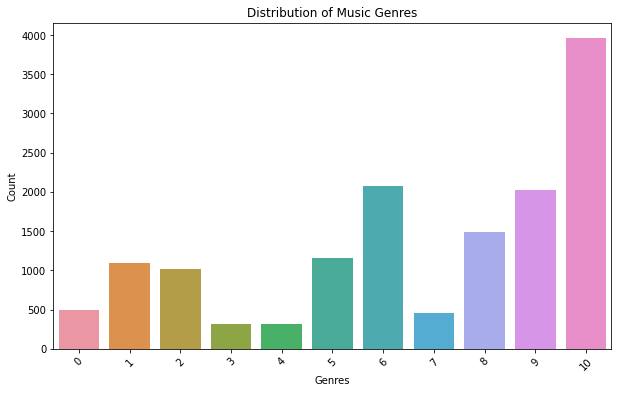

In [181]:
# Check the distribution of genres in the training data
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=train_data)
plt.title('Distribution of Music Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

In [182]:
# Save the 'Id' column from the test data
test_ids = test_data['Id']

In [183]:
# Drop irrelevant columns like 'Id', 'Artist Name', 'Track Name'
train_data = train_data.drop(['Id', 'Artist Name', 'Track Name'], axis=1)
test_data = test_data.drop(['Artist Name', 'Track Name'], axis=1)  # Keep 'Id' column for submission

In [184]:
X = train_data.drop('Class', axis=1)
y = train_data['Class']

In [185]:
# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [186]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [187]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Model Training

In [188]:

# Create a pipeline for preprocessing and model training
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [189]:
# Transform the training data using the preprocessor
X_train_processed = preprocessor.fit_transform(X_train)

In [190]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

In [191]:
# Train the model
model.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [192]:

# Make predictions on the validation set (assuming you don't have a separate validation set)
y_pred = model.predict(X_train_processed)  # You should replace X_train_processed with X_val_processed if you have a validation set

In [193]:
# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)  # You should replace y_train with y_val if you have a validation set
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


In [194]:
# Print the classification report (you should replace y_train with y_val if you have a validation set)
print(classification_report(y_train, y_pred))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       0.83      0.77      0.80       894
           2       0.98      0.97      0.98       783
           3       1.00      1.00      1.00       254
           4       1.00      1.00      1.00       242
           5       0.98      0.99      0.99       921
           6       0.90      0.89      0.89      1666
           7       1.00      1.00      1.00       374
           8       0.97      0.95      0.96      1191
           9       0.96      0.96      0.96      1613
          10       0.91      0.95      0.93      3182

    accuracy                           0.94     11516
   macro avg       0.96      0.95      0.95     11516
weighted avg       0.94      0.94      0.94     11516



# Making Predictions on the Test Set

In [195]:
# Scale the test data using the same preprocessor
X_test_scaled = preprocessor.transform(test_data.drop('Id', axis=1))  # Drop 'Id' for prediction

/Users/home/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [196]:
# Make predictions on the test set
test_predictions = model.predict(X_test_scaled)

In [197]:
# Create a DataFrame with the predictions and 'Id' column
submission_df = pd.DataFrame({'Id': test_data['Id'], 'Class': test_predictions})

In [198]:
submission_df.to_csv('music_genre_predictions.csv', index=False)# Save the predictions to a CSV file
